In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import time

#%load_ext ipycache

import random
import re
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import json

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# usecols allows us to select our choice of features
movies_df=pd.read_csv('mpst_full_data.csv')
movies_df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [3]:
movies_df.drop(movies_df.columns[[ 4 ]], axis=1, inplace=True)
movies_df.head()


,imdb_id,title,plot_synopsis,tags,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult, horror, gothic, murder, atmospheric",imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring, romantic, stupid, feel-good",imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty, murder, dramatic, cult, violence, atm...",imdb


In [4]:
print("Movies:",movies_df.shape)


Movies: (14828, 5)


In [5]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
print(movies_df.iloc[3,2])

Glenn Holland, not a morning person by anyone's standards, is woken up by his wife Iris early one bright September morning in 1964. Glenn has taken a job as a music teacher at the newly renamed John F. Kennedy High School. He intends his job to be a sabbatical from being a touring musician, during which he hopes to have more "free time" to compose. However, he soon finds that his job as a teacher is more time-consuming than he first thought.As he arrives at the school for the first time, he meets Vice Principal Wolters, who comments on his Corvair, the model of car the Ralph Nader wrote a book about. Inside the building, he meets Principal Helen Jacobs. Having got off to an awkward start with both of them, he goes to the music room and meets his students for the first time. The students are dull, apathetic, and mostly terrible musicians. At lunchtime, he meets the football coach, Bill Meister, and strikes up a friendship with him. At the end of his stressful first day, Glenn and Iris t

In [6]:
raw = movies_df.iloc[3,2].lower()
tokens = tokenizer.tokenize(raw)
print(tokens)

['glenn', 'holland', 'not', 'a', 'morning', 'person', 'by', 'anyone', 's', 'standards', 'is', 'woken', 'up', 'by', 'his', 'wife', 'iris', 'early', 'one', 'bright', 'september', 'morning', 'in', '1964', 'glenn', 'has', 'taken', 'a', 'job', 'as', 'a', 'music', 'teacher', 'at', 'the', 'newly', 'renamed', 'john', 'f', 'kennedy', 'high', 'school', 'he', 'intends', 'his', 'job', 'to', 'be', 'a', 'sabbatical', 'from', 'being', 'a', 'touring', 'musician', 'during', 'which', 'he', 'hopes', 'to', 'have', 'more', 'free', 'time', 'to', 'compose', 'however', 'he', 'soon', 'finds', 'that', 'his', 'job', 'as', 'a', 'teacher', 'is', 'more', 'time', 'consuming', 'than', 'he', 'first', 'thought', 'as', 'he', 'arrives', 'at', 'the', 'school', 'for', 'the', 'first', 'time', 'he', 'meets', 'vice', 'principal', 'wolters', 'who', 'comments', 'on', 'his', 'corvair', 'the', 'model', 'of', 'car', 'the', 'ralph', 'nader', 'wrote', 'a', 'book', 'about', 'inside', 'the', 'building', 'he', 'meets', 'principal', 'he

In [7]:
from stop_words import get_stop_words

# create English stop words list
en_stop = get_stop_words('en')

In [8]:
# remove stop words from tokens
stopped_tokens = [i for i in tokens if not i in en_stop]

print(stopped_tokens)

['glenn', 'holland', 'morning', 'person', 'anyone', 's', 'standards', 'woken', 'wife', 'iris', 'early', 'one', 'bright', 'september', 'morning', '1964', 'glenn', 'taken', 'job', 'music', 'teacher', 'newly', 'renamed', 'john', 'f', 'kennedy', 'high', 'school', 'intends', 'job', 'sabbatical', 'touring', 'musician', 'hopes', 'free', 'time', 'compose', 'however', 'soon', 'finds', 'job', 'teacher', 'time', 'consuming', 'first', 'thought', 'arrives', 'school', 'first', 'time', 'meets', 'vice', 'principal', 'wolters', 'comments', 'corvair', 'model', 'car', 'ralph', 'nader', 'wrote', 'book', 'inside', 'building', 'meets', 'principal', 'helen', 'jacobs', 'got', 'awkward', 'start', 'goes', 'music', 'room', 'meets', 'students', 'first', 'time', 'students', 'dull', 'apathetic', 'mostly', 'terrible', 'musicians', 'lunchtime', 'meets', 'football', 'coach', 'bill', 'meister', 'strikes', 'friendship', 'end', 'stressful', 'first', 'day', 'glenn', 'iris', 'talk', 'future', 'everything', 'goes', 'accordi

In [9]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

In [10]:
# stem token
stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

print(stemmed_tokens)

['glenn', 'holland', 'morn', 'person', 'anyon', 's', 'standard', 'woken', 'wife', 'iri', 'earli', 'one', 'bright', 'septemb', 'morn', '1964', 'glenn', 'taken', 'job', 'music', 'teacher', 'newli', 'renam', 'john', 'f', 'kennedi', 'high', 'school', 'intend', 'job', 'sabbat', 'tour', 'musician', 'hope', 'free', 'time', 'compos', 'howev', 'soon', 'find', 'job', 'teacher', 'time', 'consum', 'first', 'thought', 'arriv', 'school', 'first', 'time', 'meet', 'vice', 'princip', 'wolter', 'comment', 'corvair', 'model', 'car', 'ralph', 'nader', 'wrote', 'book', 'insid', 'build', 'meet', 'princip', 'helen', 'jacob', 'got', 'awkward', 'start', 'goe', 'music', 'room', 'meet', 'student', 'first', 'time', 'student', 'dull', 'apathet', 'mostli', 'terribl', 'musician', 'lunchtim', 'meet', 'footbal', 'coach', 'bill', 'meister', 'strike', 'friendship', 'end', 'stress', 'first', 'day', 'glenn', 'iri', 'talk', 'futur', 'everyth', 'goe', 'accord', 'plan', 'paycheck', 'made', 'photographi', 'abl', 'quit', 'four

In [62]:
from nltk.stem.porter import PorterStemmer
list = []
#for j in range(len(movies_df.index)):
movies_clean= movies_df.sample(200)
for j in range(len(movies_clean)):
    raw= movies_df.iloc[j, 2].lower()
    tokens = tokenizer.tokenize(raw)
    
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    
    # stem token
    stemmed_tokens = [p_stemmer.stem(k) for k in stopped_tokens]
    
    list.append(stemmed_tokens)

print(list)

[['note', 'synopsi', 'orgin', 'italian', 'releas', 'segment', 'certain', 'order', 'bori', 'karloff', 'introduc', 'three', 'horror', 'tale', 'macabr', 'supernatur', 'known', 'three', 'face', 'fear', 'telephonerosi', 'michel', 'mercier', 'attract', 'high', 'price', 'parisian', 'call', 'girl', 'return', 'spaciou', 'basement', 'apart', 'even', 'immedi', 'get', 'beset', 'seri', 'strang', 'phone', 'call', 'caller', 'soon', 'identifi', 'frank', 'ex', 'pimp', 'recent', 'escap', 'prison', 'rosi', 'terrifi', 'testimoni', 'land', 'man', 'jail', 'look', 'solac', 'rosi', 'phone', 'lesbian', 'lover', 'mari', 'lynda', 'alfonsi', 'two', 'women', 'estrang', 'time', 'rosi', 'certain', 'one', 'can', 'help', 'mari', 'agre', 'come', 'night', 'second', 'later', 'frank', 'call', 'promis', 'matter', 'call', 'protect', 'will', 'reveng', 'unknown', 'rosi', 'mari', 'caller', 'imperson', 'frank', 'marri', 'arriv', 'rosi', 's', 'apart', 'soon', 'best', 'calm', 'rosi', 's', 'nerv', 'give', 'panic', 'struck', 'woman

In [120]:
movies_clean

,imdb_id,title,plot_synopsis,tags,synopsis_source
1305,tt0964587,St. Trinian's,"Annabelle Fritton (Talulah Riley), an uptight ...",comedy,wikipedia
3263,tt0238546,Queen of the Damned,The vampire Lestat is awakened from decades of...,"paranormal, revenge, gothic, murder, flashback",wikipedia
12892,tt0378918,True Crime: Streets of LA,"Note: This plot synopsis details the ""good end...","revenge, murder, violence",wikipedia
10498,tt1259520,Bon appétit,Daniel (Unax Ugalde) is a young and ambitious ...,romantic,wikipedia
9008,tt0297162,Half Past Dead,"In San Francisco, Sasha Petrosevitch (Steven S...","violence, comedy, murder, flashback",wikipedia
...,...,...,...,...,...
5412,tt2359024,Blue Ruin,"Dwight (Macon Blair) is a beach vagrant, with ...","revenge, suspenseful, neo noir, violence",imdb
7600,tt0332379,The School of Rock,"No Vacancy, a rock band, performs at a nightcl...","cult, entertaining",wikipedia
14530,tt0058921,Arzoo,Gopal (Rajendra Kumar) is a skiing champion. H...,romantic,wikipedia
9913,tt0037096,Mrs. Parkington,"At Christmastime in 1938, Susie Parkington, an...","revenge, flashback",wikipedia


In [63]:
from gensim import corpora, models

dictionary = corpora.Dictionary(list)

In [64]:
print(dictionary.token2id)

{'19th': 0, 'abandon': 1, 'abbi': 2, 'absenc': 3, 'acquisit': 4, 'actual': 5, 'agre': 6, 'aid': 7, 'air': 8, 'alfonsi': 9, 'ali': 10, 'alreadi': 11, 'also': 12, 'anderson': 13, 'anticip': 14, 'apart': 15, 'appar': 16, 'appear': 17, 'arm': 18, 'around': 19, 'arriv': 20, 'ask': 21, 'assail': 22, 'attack': 23, 'attempt': 24, 'attract': 25, 'await': 26, 'awaken': 27, 'away': 28, 'back': 29, 'basement': 30, 'battl': 31, 'bed': 32, 'beg': 33, 'begin': 34, 'behead': 35, 'behind': 36, 'believ': 37, 'belong': 38, 'beset': 39, 'best': 40, 'bit': 41, 'bite': 42, 'blade': 43, 'blood': 44, 'bode': 45, 'bodi': 46, 'bori': 47, 'branch': 48, 'break': 49, 'breakup': 50, 'brother': 51, 'bruis': 52, 'buri': 53, 'burial': 54, 'busi': 55, 'butcher': 56, 'buzz': 57, 'cadav': 58, 'call': 59, 'caller': 60, 'calm': 61, 'camera': 62, 'can': 63, 'care': 64, 'case': 65, 'cathedr': 66, 'caus': 67, 'centuri': 68, 'certain': 69, 'chang': 70, 'chester': 71, 'child': 72, 'close': 73, 'come': 74, 'commit': 75, 'concier

In [65]:
corpus = [dictionary.doc2bow(text) for text in list]

In [66]:
print(corpus[0])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 4), (16, 1), (17, 3), (18, 1), (19, 1), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 3), (28, 1), (29, 2), (30, 1), (31, 1), (32, 5), (33, 4), (34, 2), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 3), (45, 1), (46, 4), (47, 3), (48, 1), (49, 2), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 8), (60, 2), (61, 1), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 3), (70, 1), (71, 6), (72, 2), (73, 1), (74, 3), (75, 1), (76, 2), (77, 2), (78, 1), (79, 1), (80, 1), (81, 2), (82, 5), (83, 5), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 3), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1),

In [67]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=64, id2word = dictionary, passes=10)

In [68]:
print(ldamodel.print_topics(num_topics=64, num_words=10))

[(0, '0.035*"vic" + 0.026*"jai" + 0.021*"blood" + 0.017*"aditi" + 0.012*"s" + 0.012*"quilla" + 0.012*"meghna" + 0.007*"dog" + 0.007*"war" + 0.006*"find"'), (1, '0.002*"s" + 0.001*"telli" + 0.001*"oak" + 0.001*"tell" + 0.001*"get" + 0.001*"see" + 0.001*"ask" + 0.001*"find" + 0.001*"say" + 0.001*"man"'), (2, '0.001*"s" + 0.000*"get" + 0.000*"tri" + 0.000*"one" + 0.000*"tell" + 0.000*"leav" + 0.000*"take" + 0.000*"man" + 0.000*"find" + 0.000*"ask"'), (3, '0.024*"s" + 0.009*"peter" + 0.008*"cross" + 0.007*"frank" + 0.007*"angela" + 0.006*"kyle" + 0.006*"find" + 0.006*"nola" + 0.006*"howard" + 0.005*"tell"'), (4, '0.024*"s" + 0.009*"pu" + 0.008*"yi" + 0.004*"see" + 0.004*"w" + 0.004*"back" + 0.004*"tell" + 0.004*"time" + 0.004*"one" + 0.004*"later"'), (5, '0.072*"steve" + 0.044*"furi" + 0.030*"natasha" + 0.028*"agent" + 0.027*"winter" + 0.027*"soldier" + 0.021*"car" + 0.019*"pierc" + 0.016*"d" + 0.016*"cap"'), (6, '0.051*"paddington" + 0.023*"bear" + 0.021*"millic" + 0.019*"brown" + 0.014*"


Model prep


In [69]:
from pprint import pprint
top_topics = ldamodel.top_topics(corpus, topn=10)

In [70]:
counter = 0
for topic in top_topics:
    print('Topic {}:'.format(counter))
    counter += 1
    pprint(topic)

Topic 0:
([(0.0012095551, 's'),
  (0.00044249537, 'will'),
  (0.00039693224, 'kill'),
  (0.00037361318, 'ask'),
  (0.00035795307, 'tell'),
  (0.00033695443, 'back'),
  (0.00032539922, 'one'),
  (0.00031373792, 't'),
  (0.0003128764, 'can'),
  (0.00030482453, 'two')],
 -0.2646807059130149)
Topic 1:
([(0.0013694774, 's'),
  (0.00039006153, 'get'),
  (0.0003785134, 'tri'),
  (0.00036383886, 'one'),
  (0.0003454678, 'tell'),
  (0.00034158796, 'leav'),
  (0.00033008255, 'take'),
  (0.00032699146, 'man'),
  (0.00032117934, 'find'),
  (0.0003176698, 'ask')],
 -0.2657323465793918)
Topic 2:
([(0.0012141977, 's'),
  (0.0004470758, 'tell'),
  (0.0004250034, 'get'),
  (0.00039784468, 'back'),
  (0.00038662393, 'kill'),
  (0.000372743, 't'),
  (0.00037164555, 'see'),
  (0.00034218744, 'say'),
  (0.00033792673, 'ask'),
  (0.00033185302, 'take')],
 -0.3125781866739974)
Topic 3:
([(0.03538858, 'pai'),
  (0.022473333, 'koro'),
  (0.019318372, 'whale'),
  (0.013395535, 's'),
  (0.012829596, 'leader'),
 

In [144]:
lda_model_60 = models.ldamodel.LdaModel(corpus, num_topics=60, id2word = dictionary, passes=300)

In [128]:
lda_model_30 = models.ldamodel.LdaModel(corpus, num_topics=30, id2word = dictionary, passes=100)

In [151]:
lda_model_final= lda_model_30
corpus_lda_model = lda_model_final[corpus]
for article in corpus_lda_model[5]:
    print(article)

(6, 0.028484613)
(11, 0.20133221)
(18, 0.17679027)
(22, 0.17640413)
(24, 0.3316451)
(26, 0.07662307)


In [152]:
from pprint import pprint
top_topics = lda_model_final.top_topics(corpus, topn=10)

In [153]:
counter = 0
for topic in top_topics:
    print('Topic {}:'.format(counter))
    counter += 1
    pprint(topic)

Topic 0:
([(0.025560075, 's'),
  (0.0046856985, 'get'),
  (0.004431064, 'bella'),
  (0.004186418, 'one'),
  (0.00410228, 'find'),
  (0.0040081213, 'home'),
  (0.003996707, 'leav'),
  (0.0037793005, 't'),
  (0.0036325841, 'make'),
  (0.0035485679, 'take')],
 -0.4012159822407149)
Topic 1:
([(0.026968295, 's'),
  (0.009207937, 'tell'),
  (0.006708386, 'get'),
  (0.005633701, 'take'),
  (0.0052420814, 'see'),
  (0.005023456, 'kill'),
  (0.005000536, 't'),
  (0.0049232817, 'find'),
  (0.004859142, 'toni'),
  (0.0047850213, 'back')],
 -0.6902605323686154)
Topic 2:
([(7.798519e-05, 's'),
  (7.798505e-05, 'sheryl'),
  (7.798503e-05, 'tell'),
  (7.798502e-05, 'mike'),
  (7.798502e-05, 'kill'),
  (7.7985016e-05, 'ida'),
  (7.798501e-05, 'get'),
  (7.798501e-05, 'will'),
  (7.7984994e-05, 'hunter'),
  (7.798498e-05, 'man')],
 -1.1754218166053083)
Topic 3:
([(0.026479844, 'casey'),
  (0.012684201, 'nick'),
  (0.0103849275, 's'),
  (0.010384927, 'billi'),
  (0.008085651, 'tell'),
  (0.00808565, 'ic

In [154]:
corpus_lda_model = lda_model_final[corpus]
for article in corpus_lda_model[0]:
    print(article)

(11, 0.80746126)
(22, 0.19123007)


In [155]:
movies_clean

,imdb_id,title,plot_synopsis,tags,synopsis_source
1305,tt0964587,St. Trinian's,"Annabelle Fritton (Talulah Riley), an uptight ...",comedy,wikipedia
3263,tt0238546,Queen of the Damned,The vampire Lestat is awakened from decades of...,"paranormal, revenge, gothic, murder, flashback",wikipedia
12892,tt0378918,True Crime: Streets of LA,"Note: This plot synopsis details the ""good end...","revenge, murder, violence",wikipedia
10498,tt1259520,Bon appétit,Daniel (Unax Ugalde) is a young and ambitious ...,romantic,wikipedia
9008,tt0297162,Half Past Dead,"In San Francisco, Sasha Petrosevitch (Steven S...","violence, comedy, murder, flashback",wikipedia
...,...,...,...,...,...
5412,tt2359024,Blue Ruin,"Dwight (Macon Blair) is a beach vagrant, with ...","revenge, suspenseful, neo noir, violence",imdb
7600,tt0332379,The School of Rock,"No Vacancy, a rock band, performs at a nightcl...","cult, entertaining",wikipedia
14530,tt0058921,Arzoo,Gopal (Rajendra Kumar) is a skiing champion. H...,romantic,wikipedia
9913,tt0037096,Mrs. Parkington,"At Christmastime in 1938, Susie Parkington, an...","revenge, flashback",wikipedia


In [149]:
from operator import itemgetter
index_high_corr_list = []

index_counter = 0

for article in corpus_lda_model:
    highest_feature = max(article, key=itemgetter(1))[0]
    max_correlation = max(article, key=itemgetter(1))[1]
    index_high_corr_list.append([index_counter, highest_feature, max_correlation])
    index_counter += 1

index_high_corr_list[:5]

[[0, 29, 0.55548346],
 [1, 25, 0.99485016],
 [2, 34, 0.45816225],
 [3, 55, 0.9052063],
 [4, 30, 0.9524169]]

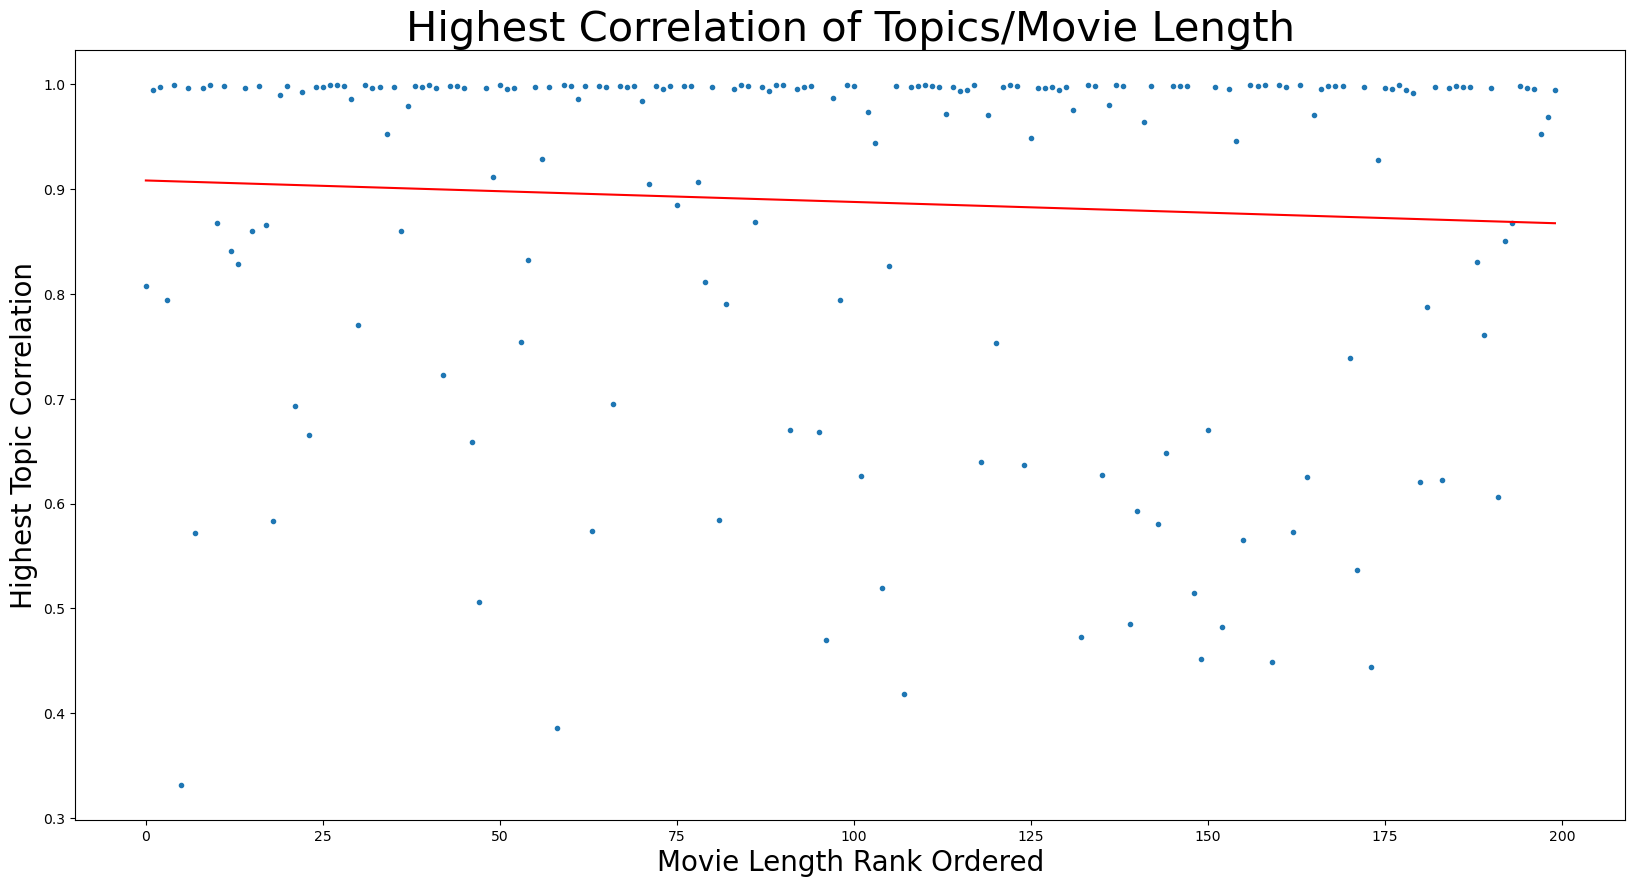

In [135]:
import matplotlib.pyplot as plt
x = [tup[0] for tup in index_high_corr_list]
y = [tup[2] for tup in index_high_corr_list]

plt.figure(figsize=(20,10))
scatter = plt.plot(x,y, '.')
line = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r')
plt.title('Highest Correlation of Topics/Movie Length', fontsize=30)
plt.xlabel("Movie Length Rank Ordered", fontsize=20)
plt.ylabel("Highest Topic Correlation", fontsize=20)
plt.show(scatter, line)

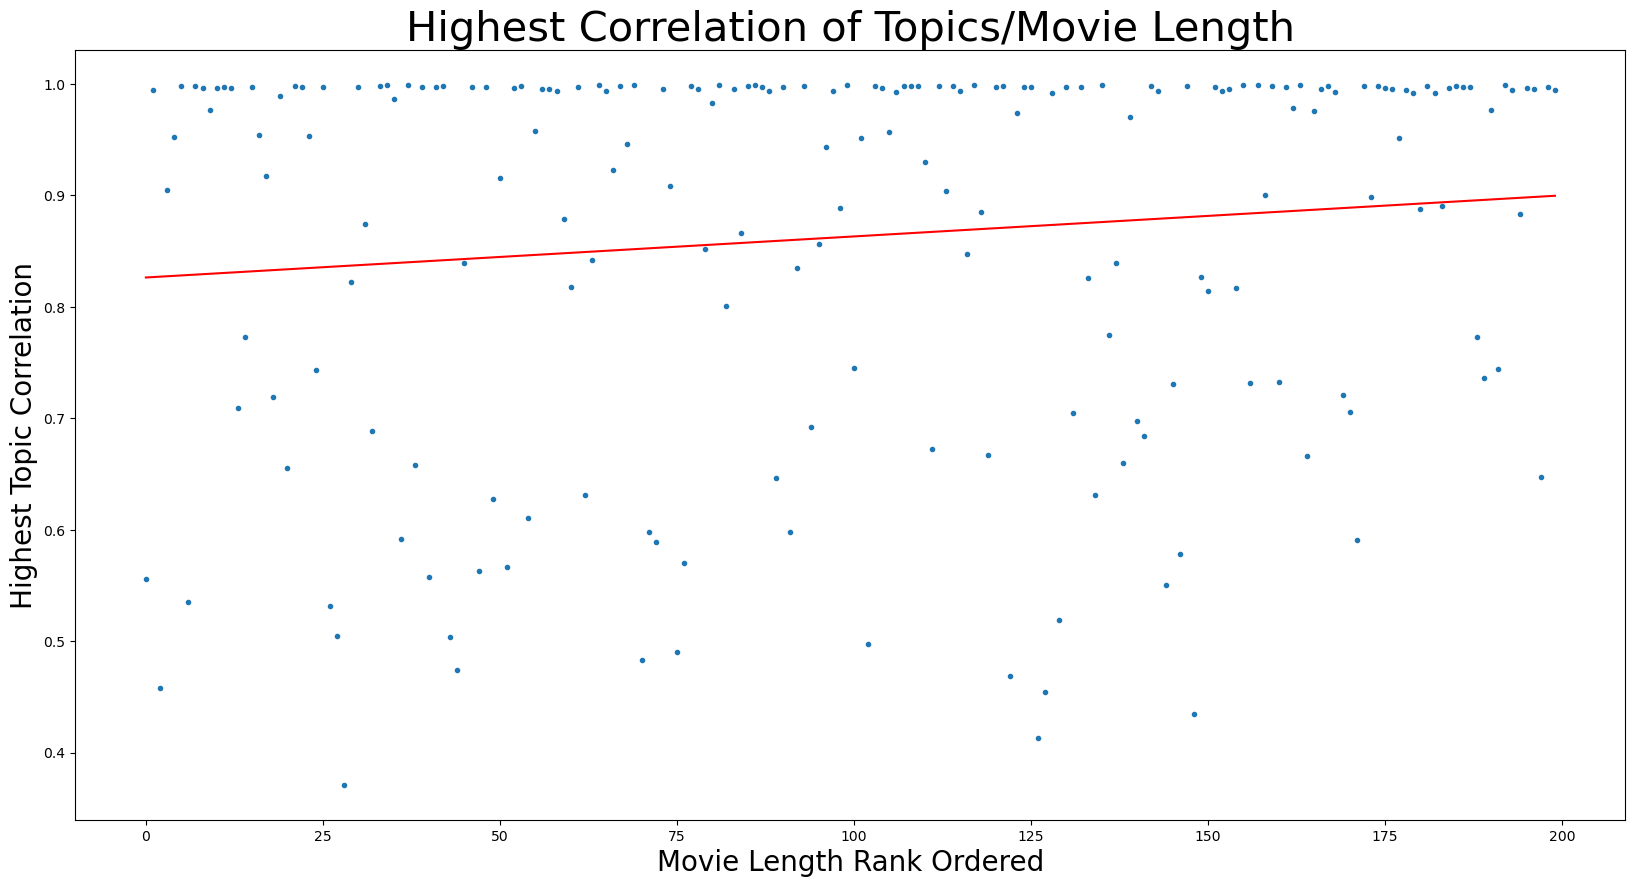

In [150]:
import matplotlib.pyplot as plt
x = [tup[0] for tup in index_high_corr_list]
y = [tup[2] for tup in index_high_corr_list]

plt.figure(figsize=(20,10))
scatter = plt.plot(x,y, '.')
line = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'r')
plt.title('Highest Correlation of Topics/Movie Length', fontsize=30)
plt.xlabel("Movie Length Rank Ordered", fontsize=20)
plt.ylabel("Highest Topic Correlation", fontsize=20)
plt.show(scatter, line)

In [136]:
from gensim.similarities import Similarity
from gensim.test.utils import common_corpus, common_dictionary, get_tmpfile
from gensim.test.utils import common_corpus, common_dictionary
from gensim.similarities import MatrixSimilarity

index = MatrixSimilarity(lda_model_final[corpus])
print(lda_model_final[corpus])

In [ ]:
def similar_movies(other_movie, title):
    

In [137]:
def movie_recommender(title):
    movies_checked = 0
    for i in range(len(movies_clean)):
        recommendation_scores = []
        if movies_clean.iloc[i][1] == title:
            lda_vectors = corpus_lda_model[i]
            sims = index[lda_vectors]
            sims = enumerate(sims)
            for sim in sims:
                movies_num = sim[0]
                recommendation_score = [movies_clean.iloc[movies_num][1], sim[1]]
                recommendation_scores.append(recommendation_score)
            
            recommendation = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)
            print("Your book's most prominent tokens are:")
            article_tokens = corpus[i]
            sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True)
            sorted_tokens_10 = sorted_tokens[:10]
            for i in range(len(sorted_tokens_10)):
                print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                             dictionary[sorted_tokens_10[i][0]], 
                                                             sorted_tokens_10[i][1]))
            print('-----')
            print("Your book's most prominant topic is:")
            print(lda_model_final.print_topic(max(lda_vectors, key=lambda item: item[1])[0]))
            print('-----')
            print('Here are your recommendations for "{}":'.format(title))
            display(recommendation[1:11])
        
        else:
            movies_checked +=1
            
        if movies_checked == len(movies_clean):
            movie_suggestions = []
            print('Sorry, but it looks like "{}" is not available.'.format(title))
            other_books = []

In [138]:
movie_recommender("Pompeii")

Your book's most prominent tokens are:
Word 1717 ("jim") appears 90 time(s).
Word 1805 ("gang") appears 33 time(s).
Word 332 ("s") appears 30 time(s).
Word 247 ("member") appears 25 time(s).
Word 6301 ("wayn") appears 25 time(s).
Word 143 ("find") appears 18 time(s).
Word 1072 ("student") appears 17 time(s).
Word 162 ("get") appears 16 time(s).
Word 29 ("back") appears 15 time(s).
Word 1848 ("train") appears 15 time(s).
-----
Your book's most prominant topic is:
0.029*"jim" + 0.020*"s" + 0.012*"gang" + 0.010*"simon" + 0.008*"member" + 0.008*"find" + 0.008*"wayn" + 0.007*"mcclane" + 0.007*"get" + 0.007*"kate"
-----
Here are your recommendations for "Pompeii":


[['Red Riding Hood', 0.99961674],
 ['Charly', 0.99961674],
 ['Constantine', 0.99961674],
 ['13 Seconds', 0.99961674],
 ['Eye in the Sky', 0.7193544],
 ['Three Days of the Condor', 0.17535248],
 ['The Cable Guy', 0.02768309],
 ['Kolja', 0.02768309],
 ['Kingdom Hearts: Chain of Memories', 0.02768309],
 ['Attack of the Crab Monsters', 0.02768309]]

In [84]:
print(movies_clean.iloc[0][1])

St. Trinian's


In [139]:
def movie_comparer(title1, title2):
    movies_checked = 0
    for i in range(len(movies_clean)):
        similarity = []
        if movies_clean.iloc[i][1] == title1:
            lda_vectors1 = corpus_lda_model[i]
            sims = index[lda_vectors1]
            for j in range(len(movies_clean)):
                if movies_clean.iloc[j][1] == title2:
                    lda_vectors2 = corpus_lda_model[j]
                    similarity.append(sims[j])
                    print('The similarity between {} and {} is: {}'.format(title1, title2, similarity[0]))

                    print('-----')
                    print("{}'s most prominent tokens are:".format(title1))
                    article_tokens = corpus[i]
                    sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True)
                    sorted_tokens_10 = sorted_tokens[:10]
                    for i in range(len(sorted_tokens_10)):
                        print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                                     dictionary[sorted_tokens_10[i][0]], 
                                                                     sorted_tokens_10[i][1]))
                    
                    print('-----')
                    print("{}'s most prominant topic is:")
                    print(lda_model_final.print_topic(max(lda_vectors1, key=lambda item: item[1])[0]))
                    
                    print('-----')
                    print("{}'s most prominent tokens are:".format(title2))
                    article_tokens = corpus[j]
                    sorted_tokens = sorted(article_tokens, key=lambda x: x[1], reverse=True)
                    sorted_tokens_10 = sorted_tokens[:10]
                    for i in range(len(sorted_tokens_10)):
                        print("Word {} (\"{}\") appears {} time(s).".format(sorted_tokens_10[i][0], 
                                                                     dictionary[sorted_tokens_10[i][0]], 
                                                                     sorted_tokens_10[i][1]))
                    
                    print('-----')
                    print("{}'s most prominant topic is:")
                    print(lda_model_final.print_topic(max(lda_vectors2, key=lambda item: item[1])[0]))

In [156]:
movie_comparer("Eye in the Sky", "Pompeii")

The similarity between Eye in the Sky and Pompeii is: 0.719353437423706
-----
Eye in the Sky's most prominent tokens are:
Word 1148 ("alejandro") appears 23 time(s).
Word 1964 ("kate") appears 23 time(s).
Word 332 ("s") appears 15 time(s).
Word 1078 ("team") appears 14 time(s).
Word 390 ("tell") appears 10 time(s).
Word 9599 ("diaz") appears 10 time(s).
Word 1341 ("gun") appears 9 time(s).
Word 6057 ("silvio") appears 9 time(s).
Word 2308 ("mexican") appears 8 time(s).
Word 6016 ("fausto") appears 8 time(s).
-----
{}'s most prominant topic is:
0.029*"jim" + 0.020*"s" + 0.012*"gang" + 0.010*"simon" + 0.008*"member" + 0.008*"find" + 0.008*"wayn" + 0.007*"mcclane" + 0.007*"get" + 0.007*"kate"
-----
Pompeii's most prominent tokens are:
Word 1717 ("jim") appears 90 time(s).
Word 1805 ("gang") appears 33 time(s).
Word 332 ("s") appears 30 time(s).
Word 247 ("member") appears 25 time(s).
Word 6301 ("wayn") appears 25 time(s).
Word 143 ("find") appears 18 time(s).
Word 1072 ("student") appears

In [118]:
movies_clean

,imdb_id,title,plot_synopsis,tags,synopsis_source
1305,tt0964587,St. Trinian's,"Annabelle Fritton (Talulah Riley), an uptight ...",comedy,wikipedia
3263,tt0238546,Queen of the Damned,The vampire Lestat is awakened from decades of...,"paranormal, revenge, gothic, murder, flashback",wikipedia
12892,tt0378918,True Crime: Streets of LA,"Note: This plot synopsis details the ""good end...","revenge, murder, violence",wikipedia
10498,tt1259520,Bon appétit,Daniel (Unax Ugalde) is a young and ambitious ...,romantic,wikipedia
9008,tt0297162,Half Past Dead,"In San Francisco, Sasha Petrosevitch (Steven S...","violence, comedy, murder, flashback",wikipedia
...,...,...,...,...,...
5412,tt2359024,Blue Ruin,"Dwight (Macon Blair) is a beach vagrant, with ...","revenge, suspenseful, neo noir, violence",imdb
7600,tt0332379,The School of Rock,"No Vacancy, a rock band, performs at a nightcl...","cult, entertaining",wikipedia
14530,tt0058921,Arzoo,Gopal (Rajendra Kumar) is a skiing champion. H...,romantic,wikipedia
9913,tt0037096,Mrs. Parkington,"At Christmastime in 1938, Susie Parkington, an...","revenge, flashback",wikipedia
